<a href="https://colab.research.google.com/github/suvedeisoyol/ML/blob/main/Testing_model_on_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, KFold

# Building Function for Feature Selection and Assessing metrics

In [ ]:
def feature_selection(x_train, y_train):
  # Define the model
  model = LinearRegression()

  # Define the cross-validation strategy
  cv = KFold(n_splits=5, shuffle=True, random_state=1)

  # Define the forward feature selection method
  sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=cv)

  # Fit the model
  sfs.fit(x_train, y_train)

  # Assigning column name into array
  column_names_list = x_train.columns.tolist()

  # Get the selected features
  selected_features = sfs.get_support(indices=True)
  selected_features_array = []
  #print("Selected features:")
  for i in selected_features:
    #print(column_names_list[i] + ", ")
    selected_features_array.append(column_names_list[i])

  # Evaluate the model with the selected features
  X_selected = sfs.transform(x_train)
  scores = cross_val_score(model, X_selected, y_train, cv=cv)

  #print(f"Cross-validation scores: {scores}")
  #print(f"Mean cross-validation score: {scores.mean()}")
  return selected_features_array


#Function for assessing the model
def assessing_model(y_test, y_pred):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np
  import matplotlib.pyplot as plt

  # Calculating MSE
  mse = mean_squared_error(y_test, y_pred)

  # Calculating RMSE
  rmse = np.sqrt(mse)

  # Calculate R-squared
  r2 = r2_score(y_test, y_pred)

  print("Mean Squared Error (MSE):", round(mse,2))
  print("Root Mean Squared Error (RMSE):", round(rmse,2))
  print(f"R-squared: {round(r2,2)}")
  #print(f"Adjusted R-squared: {round(adjusted_r2,2)}")
  return r2

  """# Plotting predicted vs true values
  plt.scatter(y_pred, y_test, color='blue', label='True vs Predicted', marker = '.')
  plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Ideal Fit')
  plt.title('Predicted vs True Values')
  plt.xlabel('Predicted Values')
  plt.ylabel('True Values')
  plt.legend()
  plt.show()
  return("done")"""

def correlation_matrix(x_train, y_train):
    #checking covariance matrix
  data_train = x_train.copy()
  data_train["claim"] = y_train
  correlation_matrix = data_train.corr().round(2)
  print(correlation_matrix["claim"])

  import matplotlib.pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #0.2f, decimal
  plt.title('Correlation Matrix')
  plt.show()

# Importing the dataset2  which has richer variables and more rows

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/suvedeisoyol/ML/refs/heads/main/Insurance_data2.csv")
data.info()
data.head(10)
# data formatting / cleaning
data.drop_duplicates(inplace = True)
data = data.dropna()
data["disease"] = data["hereditary_diseases"] != "NoDisease"
df_updated = pd.get_dummies(data, columns=['sex', 'disease', 'smoker'], drop_first = True)
bool_columns = df_updated.select_dtypes(include='bool').columns
df_updated[bool_columns] = df_updated[bool_columns].astype(int)
df_updated.head()
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 12642 entries, 0 to 14999
Data col

In [ ]:
# Spliting the Dataset for train and test

In [ ]:
from sklearn.model_selection import train_test_split
# prepare data and split test and train
#df_updated = df_updated.sample(n=2000)
input = df_updated.drop(columns = ['claim', "city", "hereditary_diseases" , "job_title"])
y = df_updated['claim']

# 5% kept for Backtesting the Model
x_train, x_test, y_train, y_test = train_test_split(input, y, test_size = 0.20, random_state = 34)

In [ ]:
df_updated.columns.tolist()

['age',
 'weight',
 'bmi',
 'hereditary_diseases',
 'no_of_dependents',
 'city',
 'bloodpressure',
 'diabetes',
 'regular_ex',
 'job_title',
 'claim',
 'sex_male',
 'disease_True',
 'smoker_1']

In [ ]:
# Column analysis for investigating multicolliearity

age                 0.31
weight              0.08
bmi                 0.21
no_of_dependents    0.09
bloodpressure       0.02
diabetes            0.13
regular_ex         -0.06
sex_male            0.05
disease_True        0.58
smoker_1            0.77
claim               1.00
Name: claim, dtype: float64


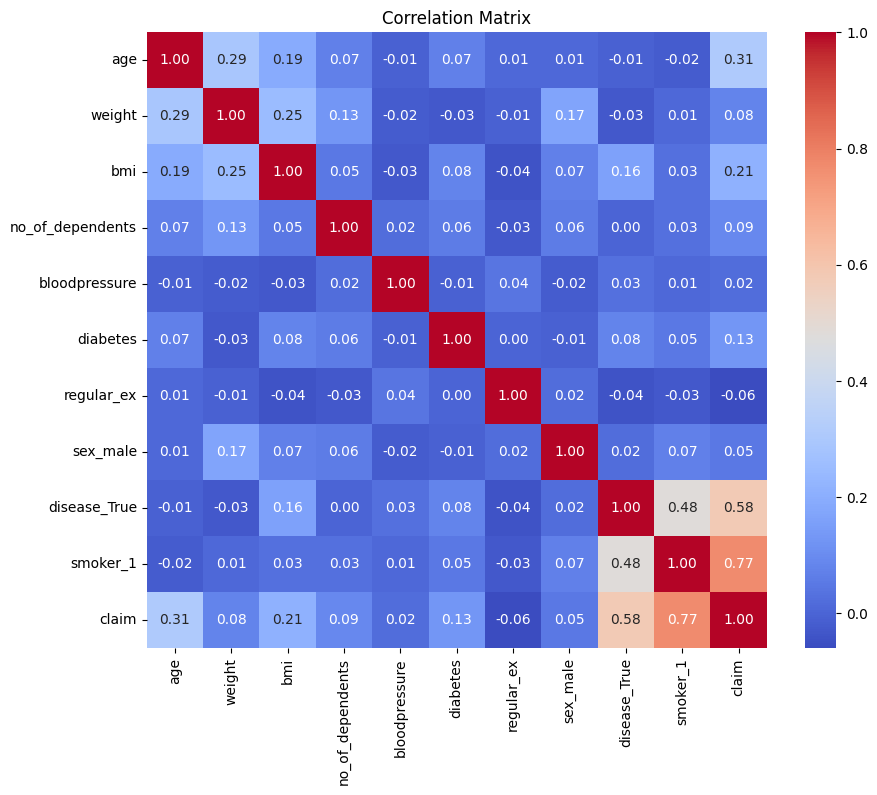

In [ ]:
correlation_matrix(x_train,y_train)


In [ ]:
# Randomly testing out relations to reduce multicollinearity

In [ ]:
x_train["age^2"] = x_train["age"]*x_train["age"]
x_train["bmi^2"] = x_train["bmi"] * x_train["bmi"]
x_train["weight^2"] = x_train["weight"] * x_train["weight"]
x_train["bmi_smoke"] = x_train["bmi"] * x_train["smoker_1"]
x_train["age_smoke"] = x_train["age"] * x_train["smoker_1"]
x_train["weight_smoke"] = x_train["weight"] * x_train["smoker_1"]
x_train["bmi^2_smoke"] = x_train["bmi^2"] * x_train["smoker_1"]
x_train["age^2_smoke"] = x_train["age^2"] * x_train["smoker_1"]
x_train["weight^2_smoke"] = x_train["weight"] * x_train["smoker_1"]
x_train["bmi_dis"] = x_train["bmi"] * x_train["disease_True"]
x_train["age_dis"] = x_train["age"] * x_train["disease_True"]
x_train["weight_dis"] = x_train["weight"] * x_train["disease_True"]
x_train["bmi^2_dis"] = x_train["bmi^2"] * x_train["disease_True"]
x_train["age^2_dis"] = x_train["age^2"] * x_train["disease_True"]
x_train["weight^2_dis"] = x_train["weight"] * x_train["disease_True"]

x_train

x_test["age^2"] = x_test["age"]*x_test["age"]
x_test["bmi^2"] = x_test["bmi"] * x_test["bmi"]
x_test["weight^2"] = x_test["weight"] * x_test["weight"]
x_test["bmi_smoke"] = x_test["bmi"] * x_test["smoker_1"]
x_test["age_smoke"] = x_test["age"] * x_test["smoker_1"]
x_test["weight_smoke"] = x_test["weight"] * x_test["smoker_1"]
x_test["bmi^2_smoke"] = x_test["bmi^2"] * x_test["smoker_1"]
x_test["age^2_smoke"] = x_test["age^2"] * x_test["smoker_1"]
x_test["weight^2_smoke"] = x_test["weight"] * x_test["smoker_1"]
x_test["bmi_dis"] = x_test["bmi"] * x_test["disease_True"]
x_test["age_dis"] = x_test["age"] * x_test["disease_True"]
x_test["weight_dis"] = x_test["weight"] * x_test["disease_True"]
x_test["bmi^2_dis"] = x_test["bmi^2"] * x_test["disease_True"]
x_test["age^2_dis"] = x_test["age^2"] * x_test["disease_True"]
x_test["weight^2_dis"] = x_test["weight"] * x_test["disease_True"]

# First Machine learning model LinearRegression

In [ ]:
#regression try with polynomial
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#make predictions with the data with the pipelie data in mind
y_pred = lin_reg.predict(x_test)

assessing_model(y_pred, y_test)

Mean Squared Error (MSE): 28326626.42
Root Mean Squared Error (RMSE): 5322.28
R-squared: 0.75


0.7488326106124541

In [ ]:
selected_feature = feature_selection(x_train, y_train)
print(selected_feature)

['age', 'weight', 'bmi', 'no_of_dependents', 'diabetes', 'regular_ex', 'sex_male', 'disease_True', 'age^2', 'bmi^2_smoke', 'bmi_dis', 'bmi^2_dis']


In [ ]:
#regression try with polynomial
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train[selected_feature], y_train)

#make predictions with the data with the pipelie data in mind
y_pred = lin_reg.predict(x_test[selected_feature])

assessing_model(y_pred, y_test)

Mean Squared Error (MSE): 28493423.71
Root Mean Squared Error (RMSE): 5337.92
R-squared: 0.75


0.7464896771443972

In [ ]:
#regression try with polynomial
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#make predictions with the data with the pipelie data in mind
y_pred = lin_reg.predict(x_test)

assessing_model(y_pred, y_test)

Mean Squared Error (MSE): 28326626.42
Root Mean Squared Error (RMSE): 5322.28
R-squared: 0.75


0.7488326106124541

# Random Forest

In [ ]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
assessing_model(y_test,y_pred)

Mean Squared Error (MSE): 5057348.01
Root Mean Squared Error (RMSE): 2248.85
R-squared: 0.96


0.9639614368993187

In [ ]:
def run(df_updated, n):
    # prepare data and split test and train
  array = []
  print( "------------------------", n , "--------------------------")
  df = df_updated.sample(n=n)
  input = df.drop(columns = ['claim', "city", "hereditary_diseases" , "job_title"])
  y = df['claim']

  # 5% kept for Backtesting the Model
  x_train, x_test, y_train, y_test = train_test_split(input, y, test_size = 0.20, random_state = 34)
  x_train["age^2"] = x_train["age"]*x_train["age"]
  x_train["bmi^2"] = x_train["bmi"] * x_train["bmi"]
  x_train["weight^2"] = x_train["weight"] * x_train["weight"]
  x_train["bmi_smoke"] = x_train["bmi"] * x_train["smoker_1"]
  x_train["age_smoke"] = x_train["age"] * x_train["smoker_1"]
  x_train["weight_smoke"] = x_train["weight"] * x_train["smoker_1"]
  x_train["bmi^2_smoke"] = x_train["bmi^2"] * x_train["smoker_1"]
  x_train["age^2_smoke"] = x_train["age^2"] * x_train["smoker_1"]
  x_train["weight^2_smoke"] = x_train["weight"] * x_train["smoker_1"]
  x_train["bmi_dis"] = x_train["bmi"] * x_train["disease_True"]
  x_train["age_dis"] = x_train["age"] * x_train["disease_True"]
  x_train["weight_dis"] = x_train["weight"] * x_train["disease_True"]
  x_train["bmi^2_dis"] = x_train["bmi^2"] * x_train["disease_True"]
  x_train["age^2_dis"] = x_train["age^2"] * x_train["disease_True"]
  x_train["weight^2_dis"] = x_train["weight"] * x_train["disease_True"]

  x_train

  x_test["age^2"] = x_test["age"]*x_test["age"]
  x_test["bmi^2"] = x_test["bmi"] * x_test["bmi"]
  x_test["weight^2"] = x_test["weight"] * x_test["weight"]
  x_test["bmi_smoke"] = x_test["bmi"] * x_test["smoker_1"]
  x_test["age_smoke"] = x_test["age"] * x_test["smoker_1"]
  x_test["weight_smoke"] = x_test["weight"] * x_test["smoker_1"]
  x_test["bmi^2_smoke"] = x_test["bmi^2"] * x_test["smoker_1"]
  x_test["age^2_smoke"] = x_test["age^2"] * x_test["smoker_1"]
  x_test["weight^2_smoke"] = x_test["weight"] * x_test["smoker_1"]
  x_test["bmi_dis"] = x_test["bmi"] * x_test["disease_True"]
  x_test["age_dis"] = x_test["age"] * x_test["disease_True"]
  x_test["weight_dis"] = x_test["weight"] * x_test["disease_True"]
  x_test["bmi^2_dis"] = x_test["bmi^2"] * x_test["disease_True"]
  x_test["age^2_dis"] = x_test["age^2"] * x_test["disease_True"]
  x_test["weight^2_dis"] = x_test["weight"] * x_test["disease_True"]

  selected_feature = feature_selection(x_train, y_train)
  #regression try with polynomial

  print("\n\n 1. Regression Model with Polynomial and selected Features")
  from sklearn.linear_model import LinearRegression
  lin_reg = LinearRegression()
  lin_reg.fit(x_train[selected_feature], y_train)
  print("Selected Features from Forward Selection Method:")
  print(selected_feature)

  #make predictions with the data with the pipelie data in mind
  y_pred = lin_reg.predict(x_test[selected_feature])
  poly = assessing_model(y_pred, y_test)
  array.append(round(poly,2))

  # Pipeline with Polynomial Features and Lasso Regression
  print("\n\n 2. Pipeline with Polynomial Features and Lasso Regression")
  pipeline_lasso = Pipeline([
      ('poly', PolynomialFeatures(degree = 1, include_bias = False)),
      ('lasso', LassoCV(alphas = np.logspace(-6, 6, 13), max_iter = 100, cv = 5))
  ])

  pipeline_lasso.fit(x_train, y_train)
  y_pred = pipeline_lasso.predict(x_test)
  lasso = assessing_model(y_test,y_pred)
  array.append(round(lasso,2))

  # Create a Random Forest Regressor model
  print("\n\n 3.Random Forest Regression model")
  model = RandomForestRegressor(n_estimators=100, random_state=42)

  # Train the model
  model.fit(x_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(x_test)
  tree = assessing_model(y_test,y_pred)
  array.append(round(tree,2))
  print("\n\n")
  return array

# Further Investigation that which models performs better at which size of dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
array_n = list(range(1000, 6000, 1000))
r_squared_array =[]
for i in array_n:
  r_squared_array.append(run(df_updated,i))



------------------------ 1000 --------------------------


 1. Regression Model with Polynomial and selected Features
Selected Features from Forward Selection Method:
['age', 'no_of_dependents', 'bloodpressure', 'regular_ex', 'sex_male', 'disease_True', 'age^2', 'weight^2', 'bmi^2_smoke', 'bmi_dis', 'bmi^2_dis', 'age^2_dis']
Mean Squared Error (MSE): 24989784.39
Root Mean Squared Error (RMSE): 4998.98
R-squared: 0.73


 2. Pipeline with Polynomial Features and Lasso Regression
Mean Squared Error (MSE): 25963151.44
Root Mean Squared Error (RMSE): 5095.4
R-squared: 0.78


 3.Random Forest Regression model
Mean Squared Error (MSE): 21172692.98
Root Mean Squared Error (RMSE): 4601.38
R-squared: 0.82



------------------------ 2000 --------------------------


 1. Regression Model with Polynomial and selected Features
Selected Features from Forward Selection Method:
['no_of_dependents', 'diabetes', 'sex_male', 'disease_True', 'smoker_1', 'age^2', 'weight^2', 'weight_smoke', 'bmi^2_smoke', 

In [ ]:
visual = pd.DataFrame(r_squared_array)
visual.index = array_n
visual.columns = ["Poly", "Lasso", "RandomForest"]
visual

,Poly,Lasso,RandomForest
1000,0.73,0.78,0.82
2000,0.79,0.83,0.90
3000,0.78,0.82,0.95
4000,0.80,0.84,0.96
5000,0.78,0.82,0.94


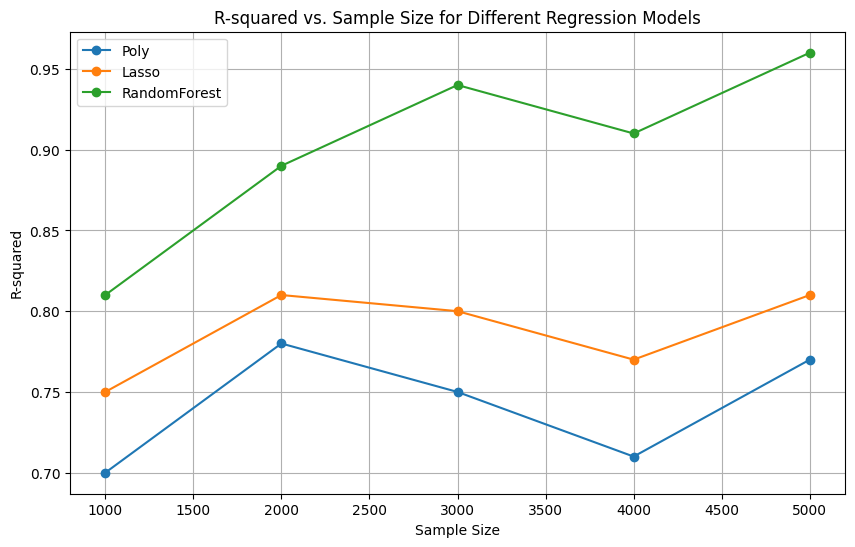

In [ ]:
# prompt: plot visaul as line

# Plot the R-squared values for each model as a line plot
plt.figure(figsize=(10, 6))
for column in visual.columns:
    plt.plot(visual.index, visual[column], marker='o', linestyle='-', label=column)

plt.xlabel('Sample Size')
plt.ylabel('R-squared')
plt.title('R-squared vs. Sample Size for Different Regression Models')
plt.legend()
plt.grid(True)
plt.show()

Comment: Based on the graph, as the samplesize increases the Random Forest Model performance increases dramatically compared to fluctuating Linear Regression Laso and Poly